In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
import pickle 

Reading Data

In [4]:
df=pd.read_csv(r"D:\projectyoutube\banking\train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             99656 non-null   float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99656.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,99984.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50516.683187,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470760,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38309.630176,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609853,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19338.105000,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,37045.600000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71690.420000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


From this  we can see misssing values in Annual_Income starts from 4th column and end in 345 column
Even though Annual_Income has dependency on Monthly_Inhand_ Salary can't able to fill missing value based on Inhand salary column
Because the missing values are continuous

In [7]:
df.head(350)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,6151,3173,2,Pomeroyi,21,473915845,Lawyer,NaN,12432.610000,3,...,Good,949.38,28.510775,368,No,364.915177,237.918381,High_spent_Large_value_payments,880.427442,Good
346,6152,3173,3,Pomeroyi,21,473915845,Lawyer,NaN,12432.610000,3,...,Good,949.38,41.478250,369,No,364.915177,237.918381,High_spent_Medium_value_payments,705.614478,Good
347,6153,3173,4,Pomeroyi,22,473915845,Lawyer,148699.32,12432.610000,3,...,Good,949.38,31.401516,370,No,364.915177,237.918381,Low_spent_Medium_value_payments,558.883990,Good
348,6154,3173,5,Pomeroyi,22,473915845,Lawyer,148699.32,12432.610000,3,...,Good,949.38,34.261556,371,No,364.915177,237.918381,High_spent_Large_value_payments,853.547398,Good


In [8]:
#checking for null values
df.isnull().sum()

ID                            0
Customer_ID                   0
Month                         0
Name                          0
Age                           0
SSN                           0
Occupation                    0
Annual_Income               344
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                  0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit         16
Num_Credit_Inquiries          0
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly       0
Payment_Behaviour             0
Monthly_Balance               0
Credit_Score                  0
dtype: int64

In [9]:
#Target Column = Categorical column checking classes
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

Preprocessing

In [10]:
#filling missing value
rows_with_missing = df[df.isna().any(axis=1)]
rows_with_missing

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,27.262259,270,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,22.537593,271,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23,821000265,Scientist,NaN,1824.843333,3,...,Good,809.98,23.933795,272,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,6144,39873,7,Jaisinghanij,42,445184420,Architect,NaN,1740.539167,6,...,Standard,749.95,38.338774,137,Yes,49.348666,23.560490,Low_spent_Large_value_payments,275.431459,Standard
343,6145,39873,8,Jaisinghanij,42,445184420,Architect,NaN,1740.539167,6,...,Standard,749.95,28.629030,138,Yes,49.348666,23.560490,High_spent_Large_value_payments,322.737743,Standard
344,6150,3173,1,Pomeroyi,21,473915845,Lawyer,NaN,12432.610000,3,...,Good,949.38,41.687213,367,No,364.915177,237.918381,High_spent_Large_value_payments,822.193995,Good
345,6151,3173,2,Pomeroyi,21,473915845,Lawyer,NaN,12432.610000,3,...,Good,949.38,28.510775,368,No,364.915177,237.918381,High_spent_Large_value_payments,880.427442,Good


Checking which method is suitable for filling missing values

<Axes: >

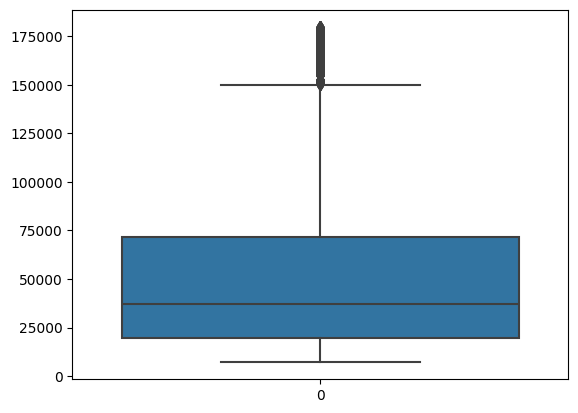

In [14]:
sns.boxplot(df["Annual_Income"])

<Axes: >

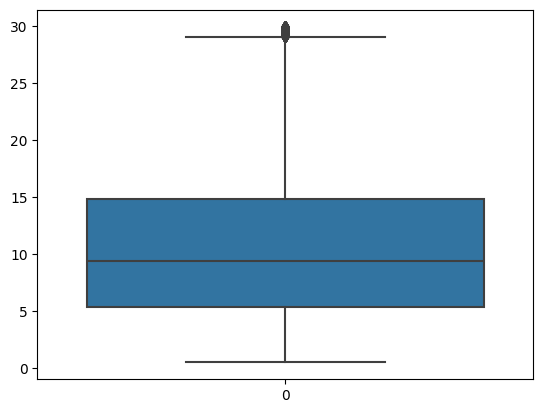

In [16]:
sns.boxplot(df["Changed_Credit_Limit"])

Both column has outliers so median is the best method for filling missing values

In [17]:
# Selecting methods for filling by testing various method in sample data
median_Annual_Income = df['Annual_Income'].median()
df['Annual_Income'].fillna(median_Annual_Income, inplace=True)
median_Changed_Credit_limit=df["Changed_Credit_Limit"].median()
df["Changed_Credit_Limit"].fillna(median_Changed_Credit_limit,inplace=True)

C:\Users\aarun\AppData\Local\Temp\ipykernel_52544\1534396096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Annual_Income'].fillna(mean_Annual_Income, inplace=True)
C:\Users\aarun\AppData\Local\Temp\ipykernel_52544\1534396096.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [18]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [19]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50516.683187,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470760,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38243.680187,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609324,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19375.760000,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,37261.310000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71605.000000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


Checking Duplicate Values and Rows

In [20]:
#Checking for duplicate values
# Identify and display all duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]


Dropping unwanted feature columns

In [21]:
df.drop(['ID', 'Customer_ID',"Name"], axis=1, inplace=True)


In [39]:
df.drop(['Month', 'Age', 'SSN'], axis=1, inplace=True)

Encode categorical column

In [22]:
df[["Occupation","Type_of_Loan","Credit_Mix",'Payment_of_Min_Amount',"Payment_Behaviour","Credit_Score"]]

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Small_value_payments,Good
1,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...
99995,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99996,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


In [30]:
df["Occupation"].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [25]:
arr=df["Type_of_Loan"].unique()
len(np.unique(arr))

6261

In [26]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [27]:
df["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [28]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [29]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
#automated eda
import dabl
dabl.plot(df, target_col="Credit_Score")

In [ ]:
# Automate EDA
# use ProfileReport
pr_df = ProfileReport(df)
# show pr_df
pr_df

In [97]:
import dtale

In [ ]:
d = dtale.show(df)
d


In [95]:
pr_df.to_file("Credit_score.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column ' encoded_Credit_Mix'. 
df['encoded_ Credit_Mix']= label_encoder.fit_transform(df['Credit_Mix'])
df['encoded_ Credit_Mix'].unique()

array([1, 2, 0])

In [32]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'encoded_Occupation'. 
df['encoded_Occupation']= label_encoder.fit_transform(df['Occupation'])
df['encoded_Occupation'].unique()

array([12, 13,  4,  5,  2,  7, 10,  3,  6,  8,  0, 11,  9, 14,  1])

In [33]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'encoded_Payment_of_Min_Amount'. 
df['encoded_Payment_of_Min_Amount']= label_encoder.fit_transform(df['Payment_of_Min_Amount'])
df['encoded_Payment_of_Min_Amount'].unique()

array([1, 0, 2])

In [35]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column ' encoded_Type_of_Loan'. 
df['encoded_ Type_of_Loan']= label_encoder.fit_transform(df['Type_of_Loan'])
df['encoded_ Type_of_Loan'].unique()

array([ 128,  684,   63, ..., 2103, 4832, 4914])

In [34]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'encoded_Payment_Behaviour'. 
df['encoded_Payment_Behaviour']= label_encoder.fit_transform(df['Payment_Behaviour'])
df['encoded_Payment_Behaviour'].unique()

array([2, 3, 4, 5, 1, 0])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Month                          100000 non-null  int64  
 1   Age                            100000 non-null  int64  
 2   SSN                            100000 non-null  int64  
 3   Occupation                     100000 non-null  object 
 4   Annual_Income                  100000 non-null  float64
 5   Monthly_Inhand_Salary          100000 non-null  float64
 6   Num_Bank_Accounts              100000 non-null  int64  
 7   Num_Credit_Card                100000 non-null  int64  
 8   Interest_Rate                  100000 non-null  int64  
 9   Num_of_Loan                    100000 non-null  int64  
 10  Type_of_Loan                   100000 non-null  object 
 11  Delay_from_due_date            100000 non-null  int64  
 12  Num_of_Delayed_Payment         

Outlier detection

In [40]:
df.columns

Index(['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'encoded_ Credit_Mix', 'encoded_Occupation',
       'encoded_Payment_of_Min_Amount', 'encoded_Payment_Behaviour',
       'encoded_ Type_of_Loan'],
      dtype='object')

<Axes: >

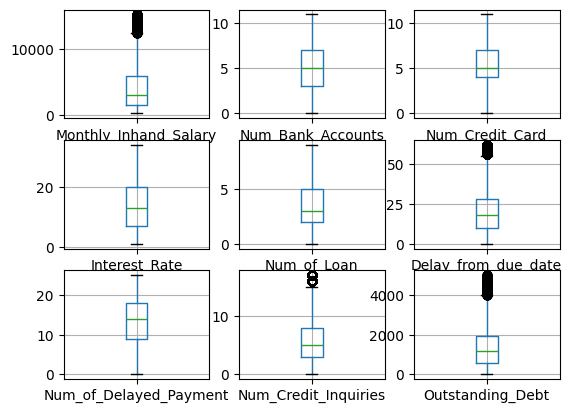

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3)  # Create a 3x3 array of subplots

# Add boxplot to the first subplot
df.boxplot(column='Monthly_Inhand_Salary', ax=axes[0, 0])
df.boxplot(column='Num_Bank_Accounts', ax=axes[0, 1])
df.boxplot(column='Num_Credit_Card', ax=axes[0, 2])
df.boxplot(column='Interest_Rate', ax=axes[1, 0])
df.boxplot(column='Num_of_Loan', ax=axes[1, 1])
df.boxplot(column='Delay_from_due_date', ax=axes[1, 2])
df.boxplot(column='Num_of_Delayed_Payment', ax=axes[2, 0])
df.boxplot(column='Num_Credit_Inquiries', ax=axes[2, 1])
df.boxplot(column='Outstanding_Debt', ax=axes[2, 2])

From the graph we have to treat outliers in Monthly inhand salary,Delay from due date, Number of credit enquiry,Outstanding debt

<Axes: >

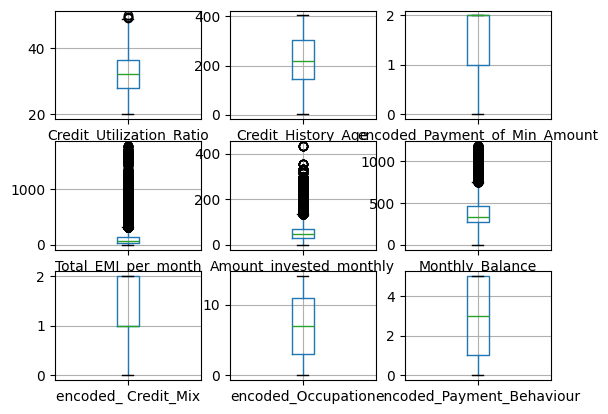

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=3)  # Create a 3x3 array of subplots

# Add boxplot to the first subplot
df.boxplot(column='Credit_Utilization_Ratio', ax=axes[0, 0])
df.boxplot(column='Credit_History_Age', ax=axes[0, 1])
df.boxplot(column='encoded_Payment_of_Min_Amount', ax=axes[0, 2])
df.boxplot(column='Total_EMI_per_month', ax=axes[1, 0])
df.boxplot(column='Amount_invested_monthly', ax=axes[1, 1])
df.boxplot(column='Monthly_Balance', ax=axes[1, 2])
df.boxplot(column='encoded_ Credit_Mix', ax=axes[2, 0])
df.boxplot(column='encoded_Occupation', ax=axes[2, 1])
df.boxplot(column='encoded_Payment_Behaviour', ax=axes[2, 2])

From the graph it is inferrred that outliers should be treated in Credit Utilization ratio, Total EMI per month,Amount invested monthly,Monthly Balance

<Axes: >

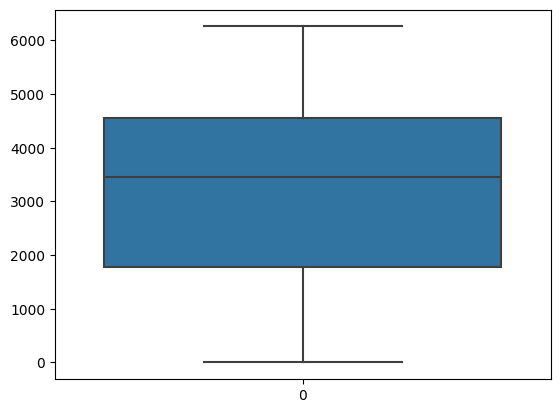

In [52]:
sns.boxplot(df["encoded_ Type_of_Loan"])

<Axes: >

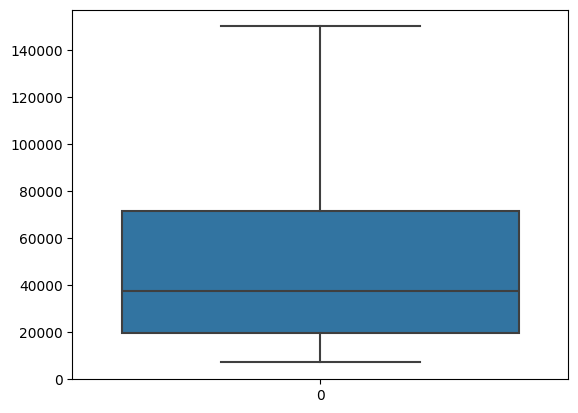

In [55]:
# Treating the outliers

Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Annual_Income'] = df['Annual_Income'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df["Annual_Income"])

<Axes: >

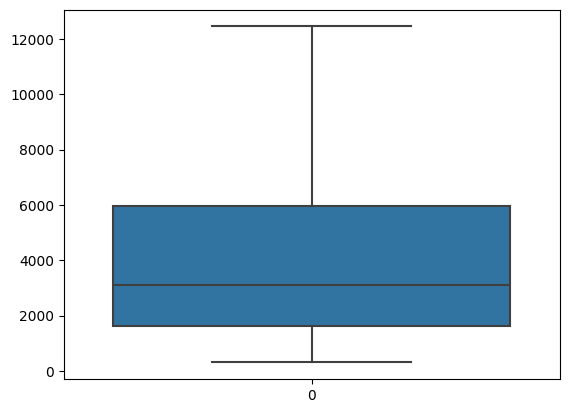

In [56]:
Q1 = df['Monthly_Inhand_Salary'].quantile(0.25)
Q3 = df['Monthly_Inhand_Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Monthly_Inhand_Salary'])

<Axes: >

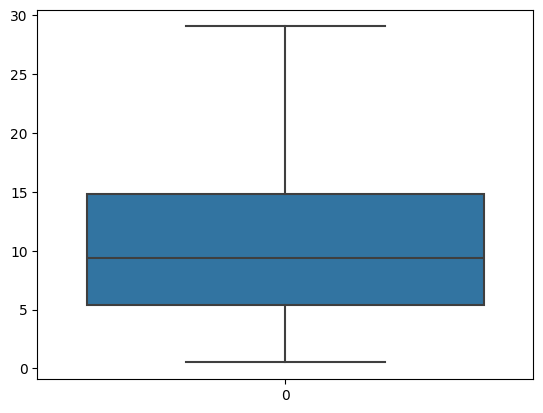

In [58]:
#Changed_Credit_Limit
Q1 = df['Changed_Credit_Limit'].quantile(0.25)
Q3 = df['Changed_Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Changed_Credit_Limit'])

<Axes: >

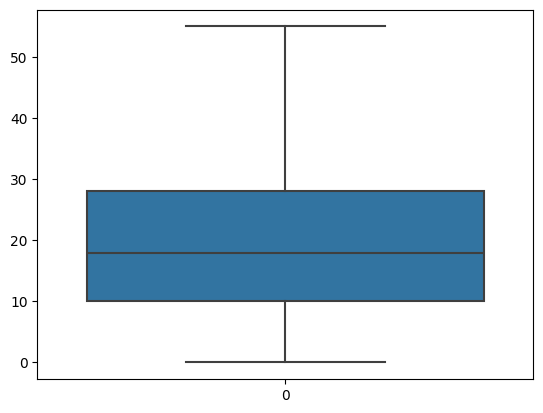

In [59]:
#Delay_from_due_date
Q1 = df['Delay_from_due_date'].quantile(0.25)
Q3 = df['Delay_from_due_date'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Delay_from_due_date'] = df['Delay_from_due_date'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Delay_from_due_date'])

<Axes: >

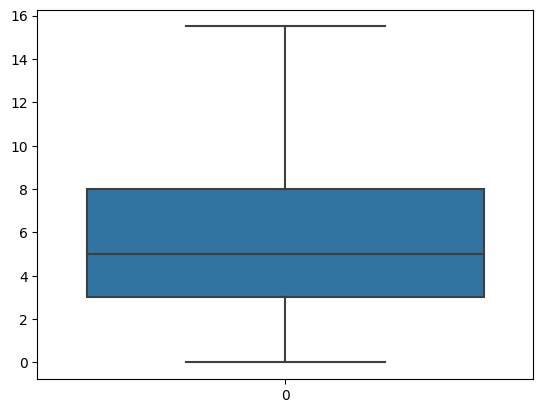

In [60]:
#Num_Credit_Inquiries
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Num_Credit_Inquiries'])

<Axes: >

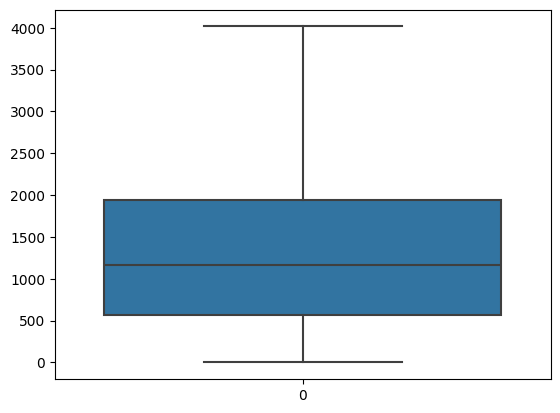

In [61]:
#Outstanding_Debt
Q1 = df['Outstanding_Debt'].quantile(0.25)
Q3 = df['Outstanding_Debt'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Outstanding_Debt'] = df['Outstanding_Debt'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Outstanding_Debt'])

<Axes: >

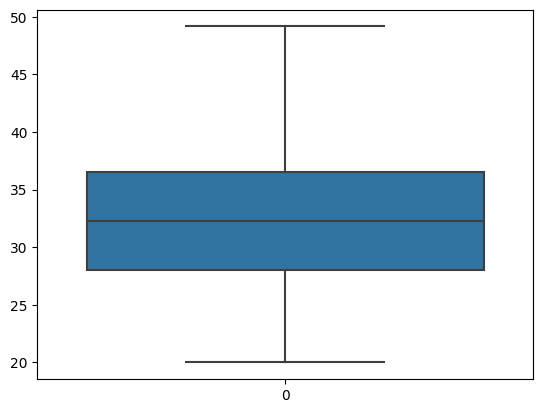

In [62]:
#Credit_Utilization_Ratio
Q1 = df['Credit_Utilization_Ratio'].quantile(0.25)
Q3 = df['Credit_Utilization_Ratio'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Credit_Utilization_Ratio'])

<Axes: >

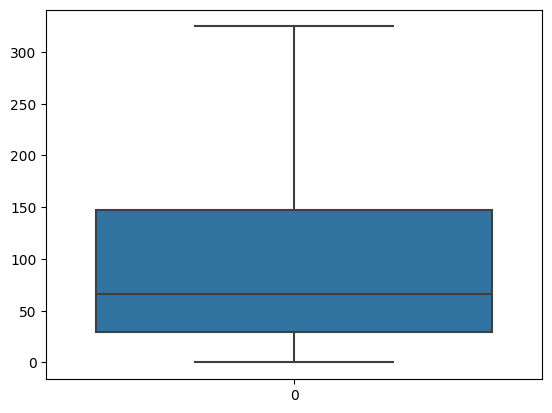

In [63]:
#Total_EMI_per_month
Q1 = df['Total_EMI_per_month'].quantile(0.25)
Q3 = df['Total_EMI_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Total_EMI_per_month'])

<Axes: >

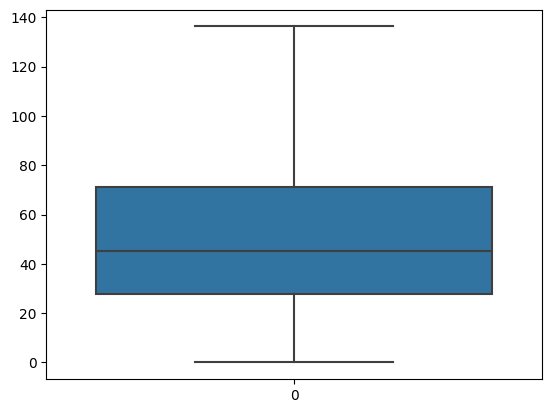

In [64]:
#Amount_invested_monthly
Q1 = df['Amount_invested_monthly'].quantile(0.25)
Q3 = df['Amount_invested_monthly'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Amount_invested_monthly'])

<Axes: >

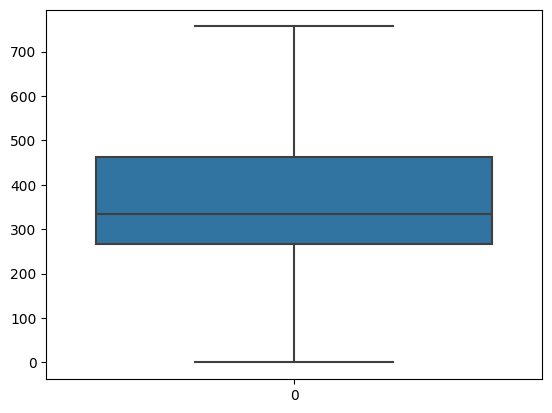

In [65]:
#Monthly_Balance
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df['Monthly_Balance'] = df['Monthly_Balance'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df['Monthly_Balance'])

In [68]:
df.drop(['Credit_Mix','Occupation','Type_of_Loan','Payment_Behaviour','Payment_of_Min_Amount'],axis=1,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Annual_Income                  100000 non-null  float64
 1   Monthly_Inhand_Salary          100000 non-null  float64
 2   Num_Bank_Accounts              100000 non-null  int64  
 3   Num_Credit_Card                100000 non-null  int64  
 4   Interest_Rate                  100000 non-null  int64  
 5   Num_of_Loan                    100000 non-null  int64  
 6   Delay_from_due_date            100000 non-null  int64  
 7   Num_of_Delayed_Payment         100000 non-null  int64  
 8   Changed_Credit_Limit           100000 non-null  float64
 9   Num_Credit_Inquiries           100000 non-null  float64
 10  Outstanding_Debt               100000 non-null  float64
 11  Credit_Utilization_Ratio       100000 non-null  float64
 12  Credit_History_Age             

In [72]:
data=df.copy()

In [75]:
data["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [77]:
data["Credit_Score"] = data["Credit_Score"].map({"Standard": 1, 
                               "Good": 2, 
                               "Poor": 0})

In [83]:
corr=data.corr(method="pearson")
corr["Credit_Score"]

Annual_Income                    0.211509
Monthly_Inhand_Salary            0.209837
Num_Bank_Accounts               -0.388165
Num_Credit_Card                 -0.404435
Interest_Rate                   -0.485409
Num_of_Loan                     -0.358355
Delay_from_due_date             -0.434660
Num_of_Delayed_Payment          -0.372978
Changed_Credit_Limit            -0.170639
Num_Credit_Inquiries            -0.435878
Outstanding_Debt                -0.398906
Credit_Utilization_Ratio         0.045792
Credit_History_Age               0.388788
Total_EMI_per_month             -0.040543
Amount_invested_monthly          0.175137
Monthly_Balance                  0.204601
Credit_Score                     1.000000
encoded_ Credit_Mix              0.168909
encoded_Occupation              -0.009549
encoded_Payment_of_Min_Amount   -0.278127
encoded_Payment_Behaviour       -0.118732
encoded_ Type_of_Loan            0.011230
Name: Credit_Score, dtype: float64

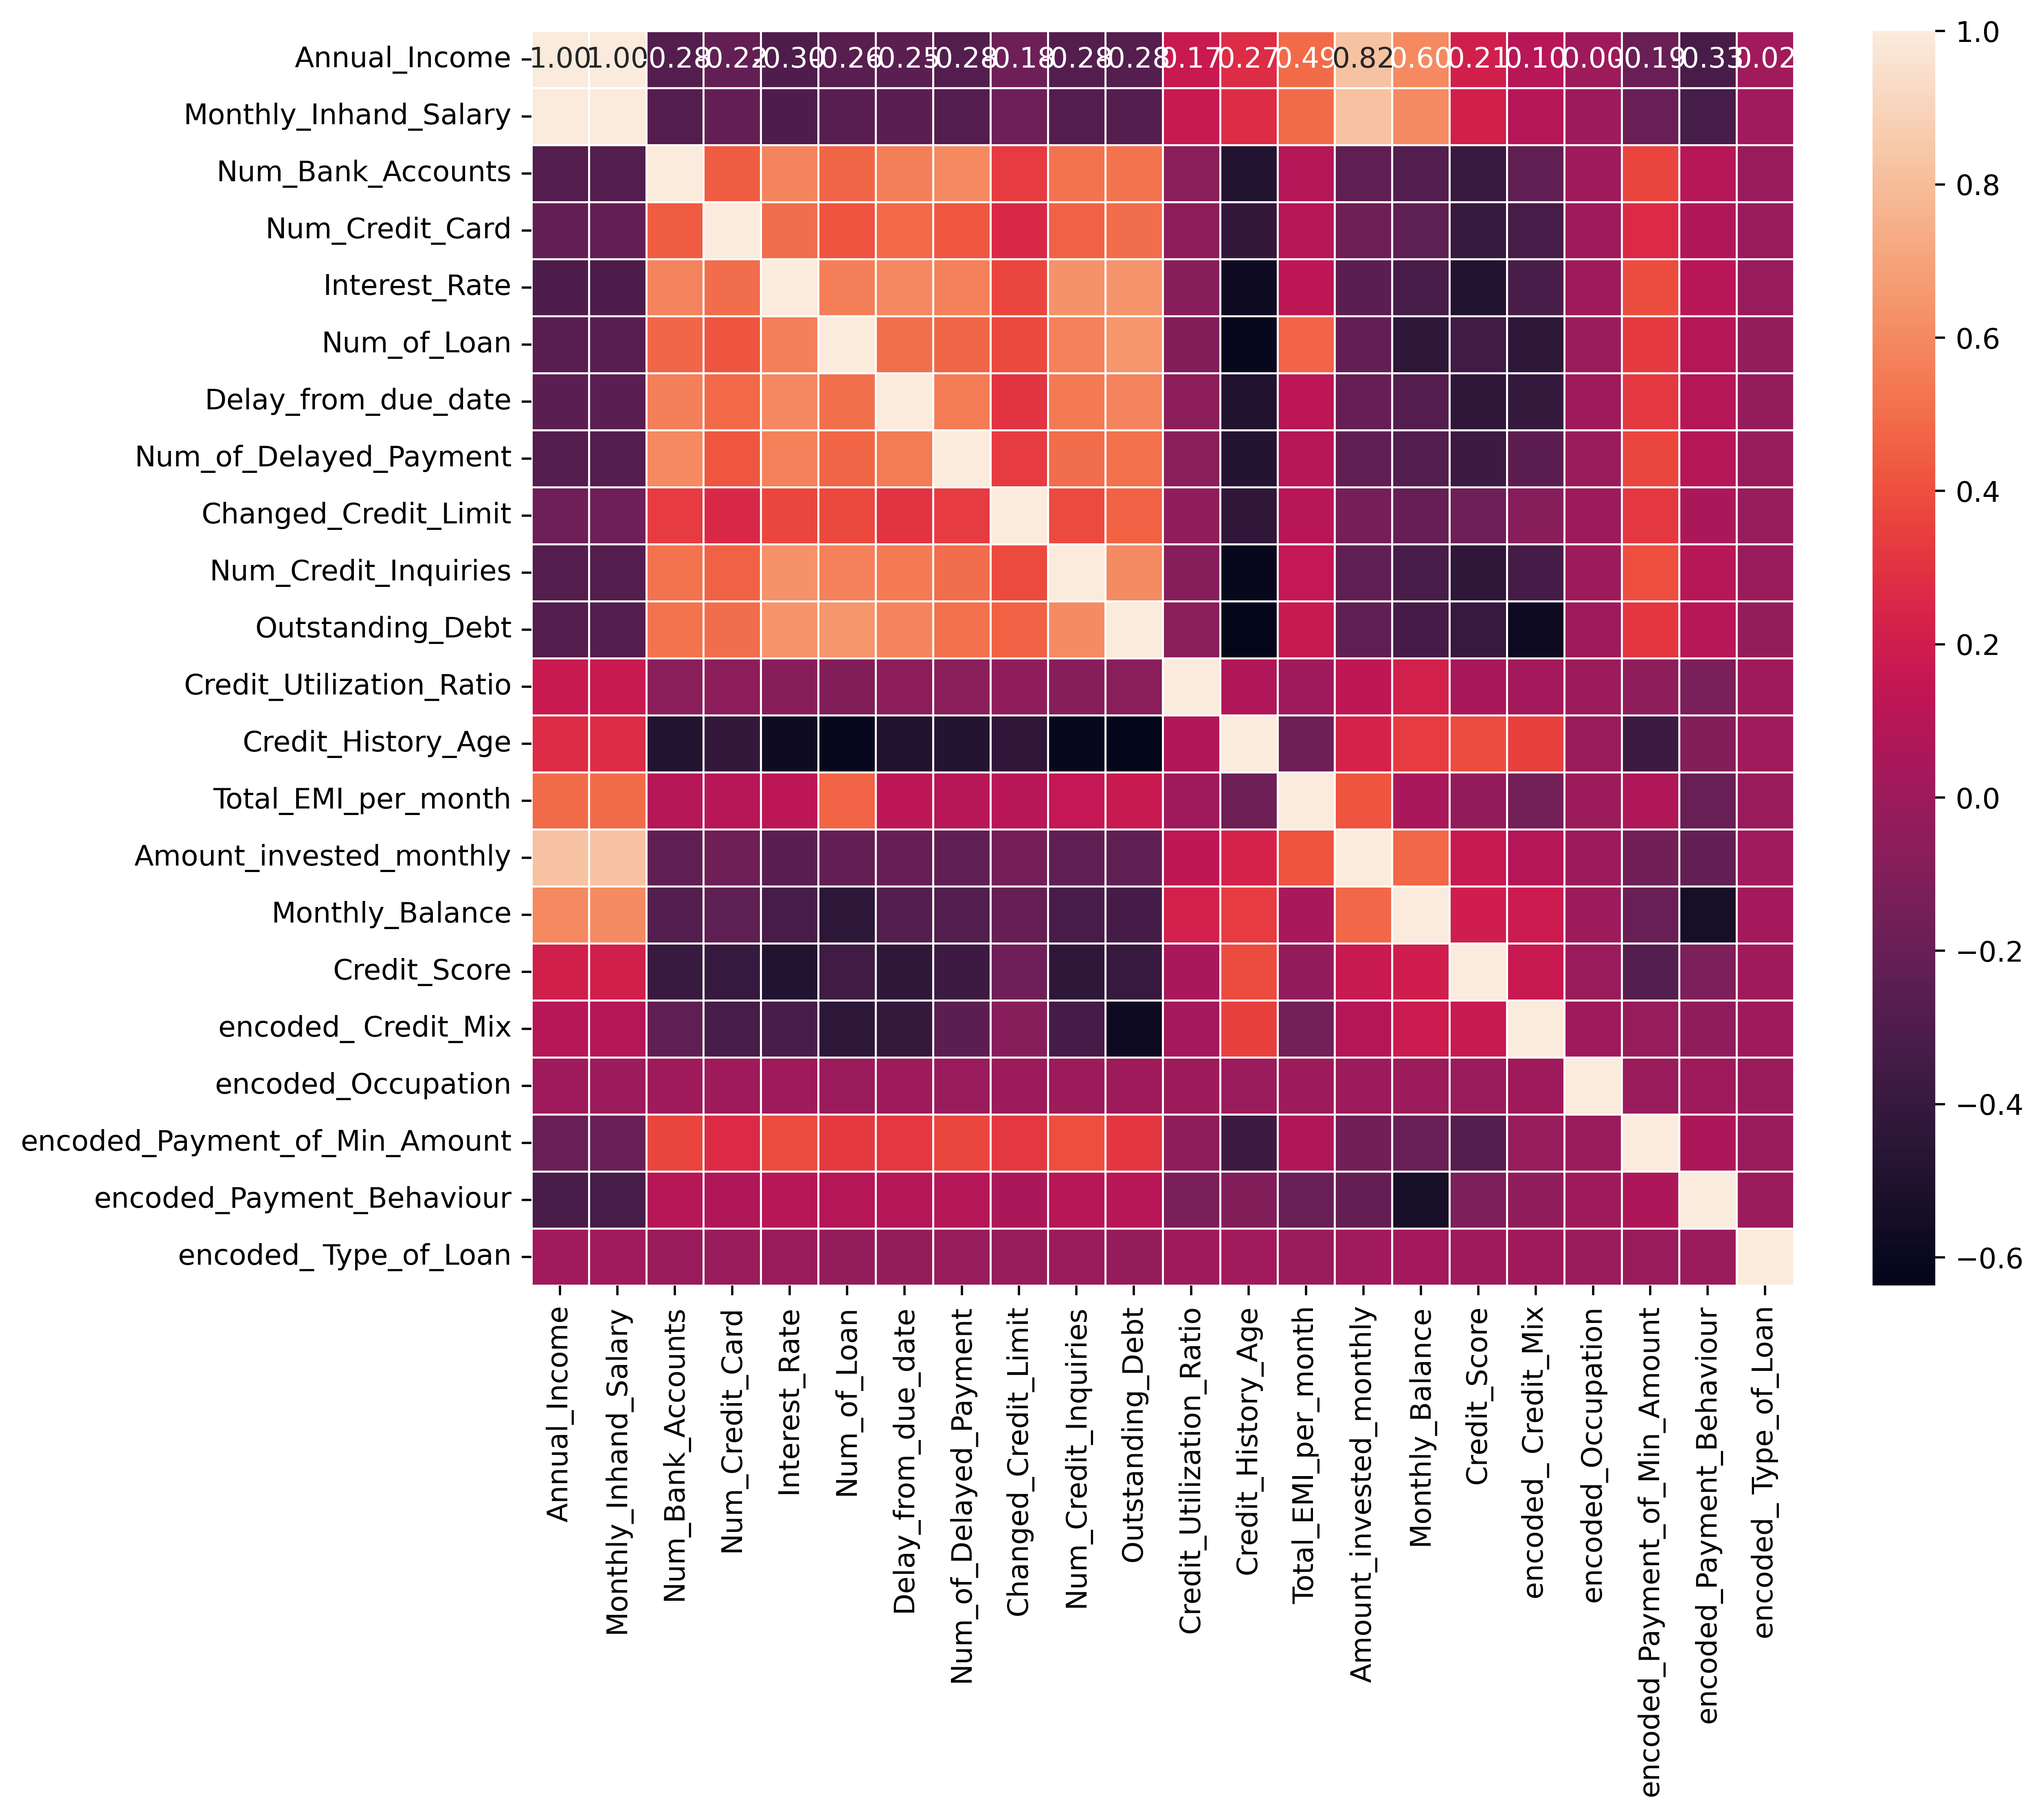

In [82]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()


Automated EDA using dabl

d:\projectyoutube\.venv\lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
d:\projectyoutube\.venv\lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
d:\projectyoutube\.venv\lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
d:\projectyoutube\.venv\lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, 

Target looks like classification


d:\projectyoutube\.venv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\projectyoutube\.venv\lib\site-packages\dabl\plot\utils.py:704: UserWarning: Dropped 72 outliers in column Amount_invested_monthly.
  warn("Dropped {} outliers in column {}.".format(
d:\projectyoutube\.venv\lib\site-packages\dabl\plot\utils.py:704: UserWarning: Dropped 429 outliers in column Total_EMI_per_month.
  warn("Dropped {} outliers in column {}.".format(
d:\projectyoutube\.venv\lib\site-packages\dabl\plot\utils.py:607: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

Linear Discriminant Analysis training set score: 0.572


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Credit_Score'>,
 [<Figure size 2000x1200 with 20 Axes>,
  array([[<Axes: title={'center': '0.600'}, xlabel='Interest_Rate(jittered)', ylabel='Num_Bank_Accounts(jittered)'>,
          <Axes: title={'center': '0.592'}, xlabel='Interest_Rate(jittered)', ylabel='Delay_from_due_date(jittered)'>,
          <Axes: title={'center': '0.578'}, xlabel='Interest_Rate(jittered)', ylabel='Num_of_Delayed_Pa...(jittered)'>,
          <Axes: title={'center': '0.558'}, xlabel='Interest_Rate(jittered)', ylabel='Num_Credit_Inquiries(jittered)'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 400x400 with 1 Axes>],
 array([[<Axes: title={'center': 'Credit_Mix'}>,
         <Axes: title={'center': 'Payment_of_Min_Amount'}>,
         <Axes: title={'center': 'Payment_Behaviour'}>,
         <Axes: title={'center': 'Occupation'}>]], dtype=object)]

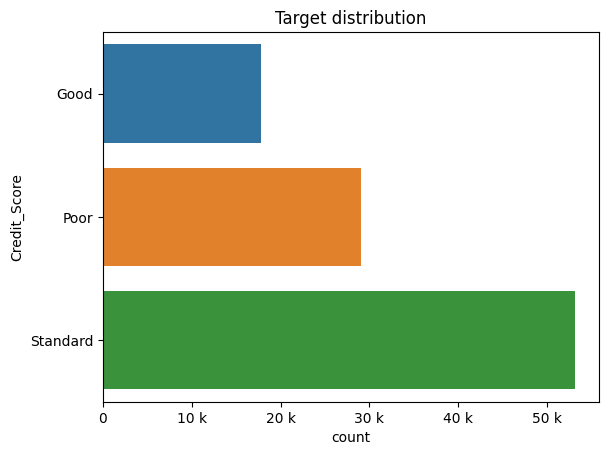

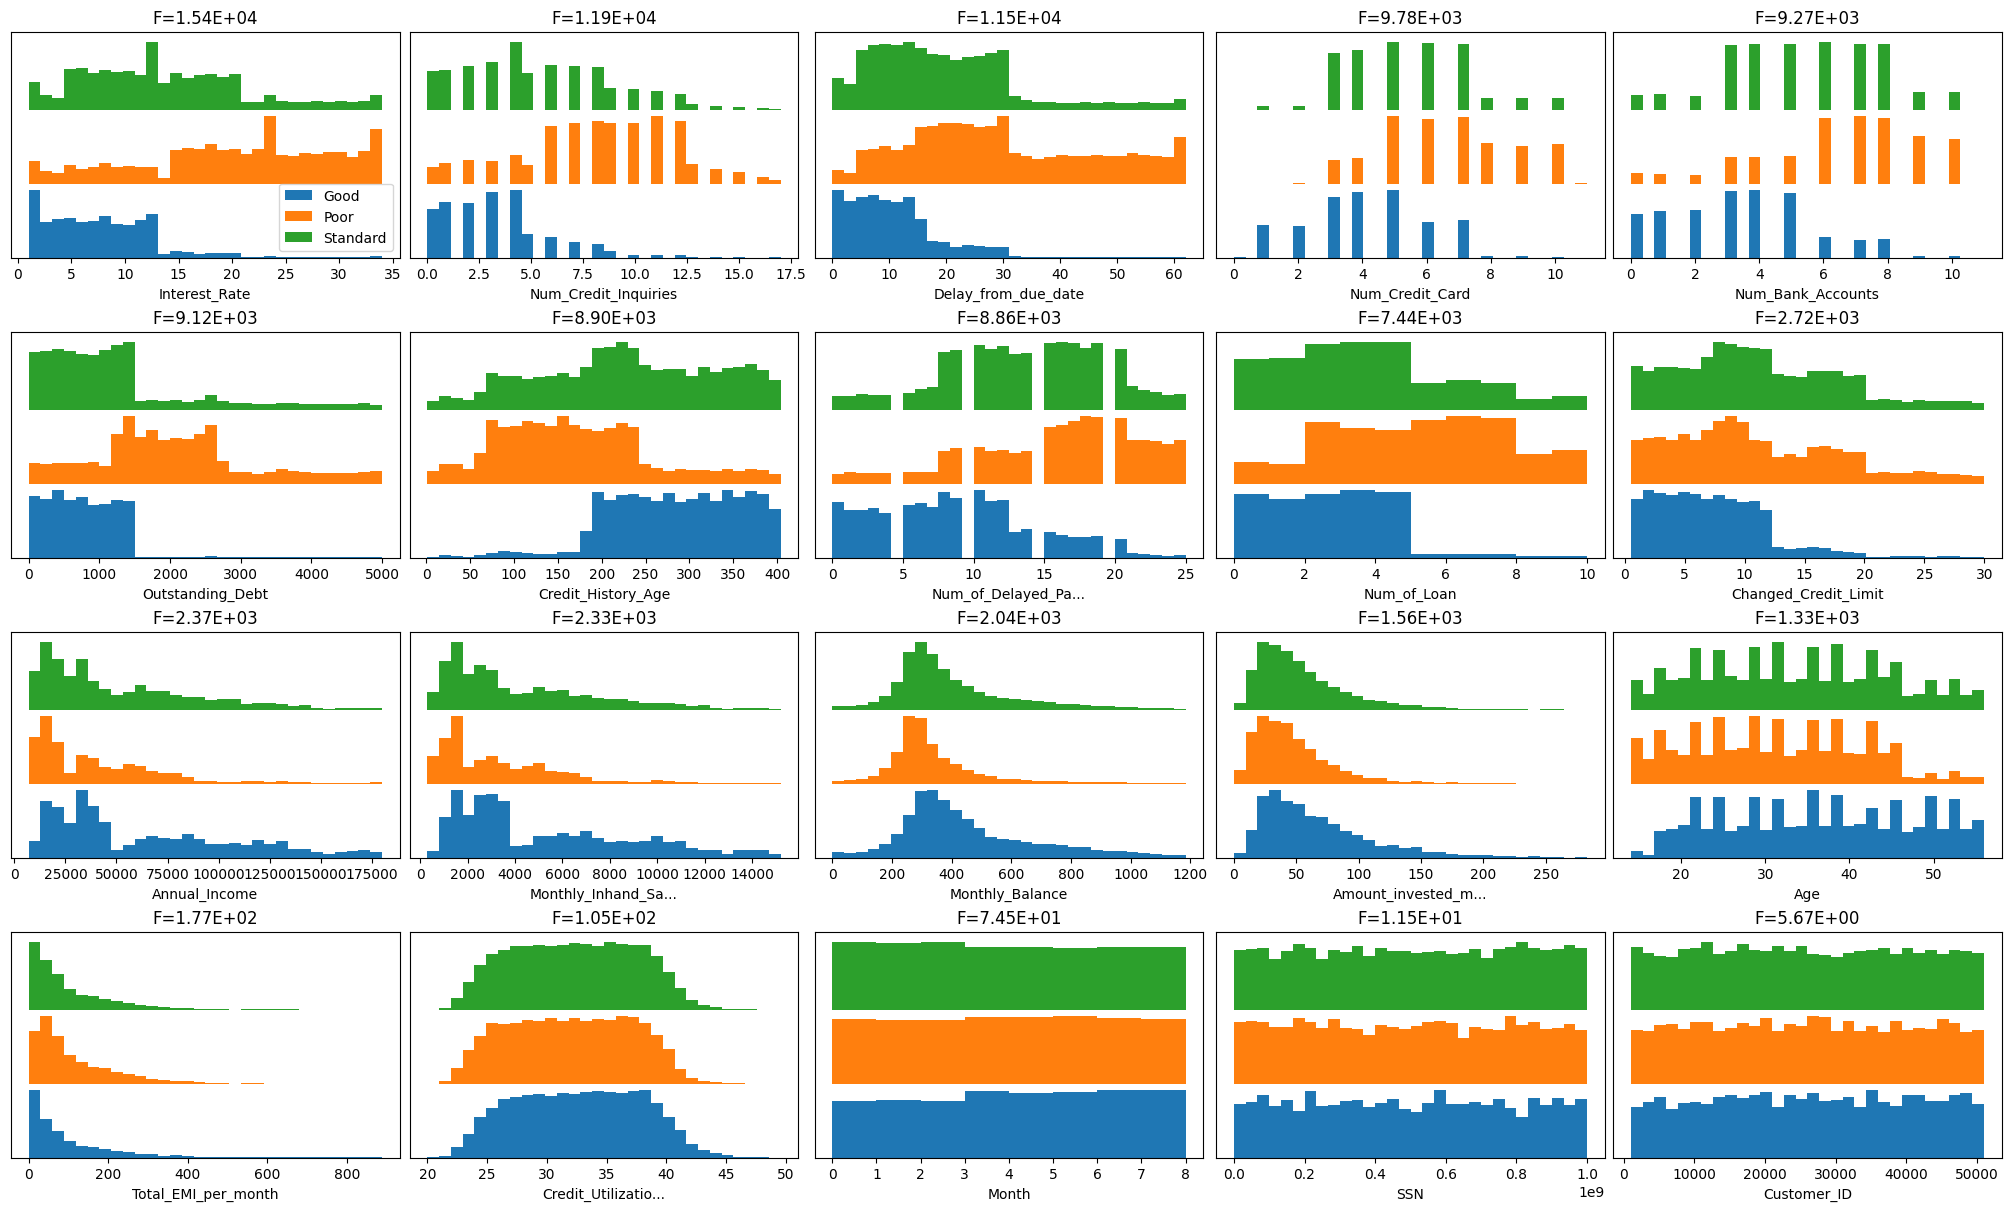

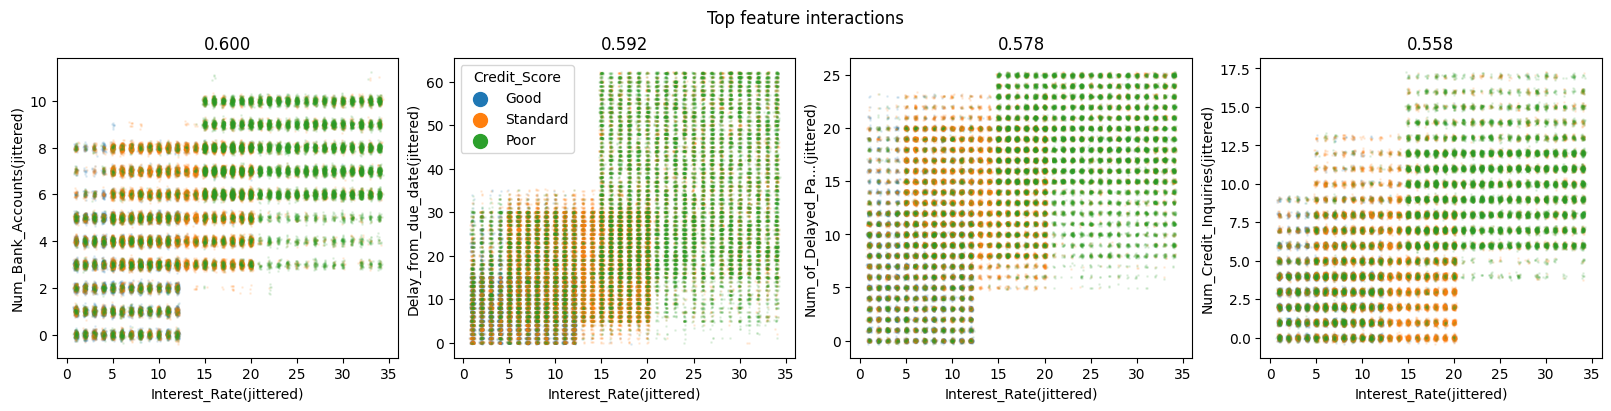

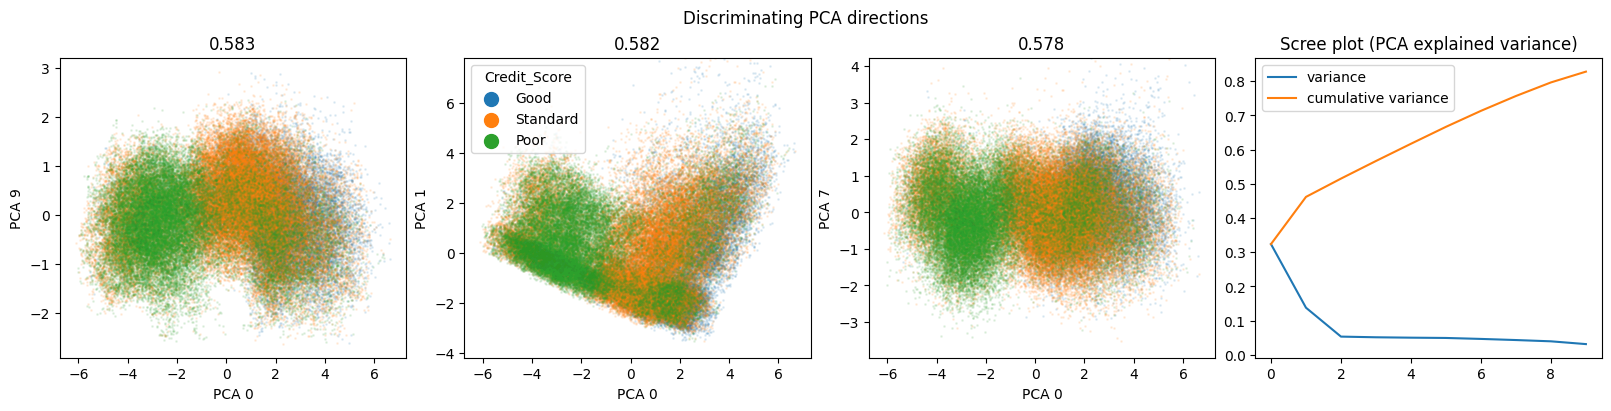

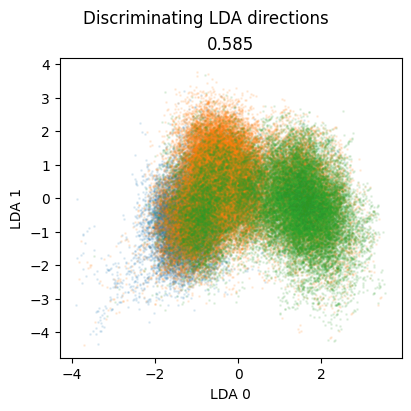

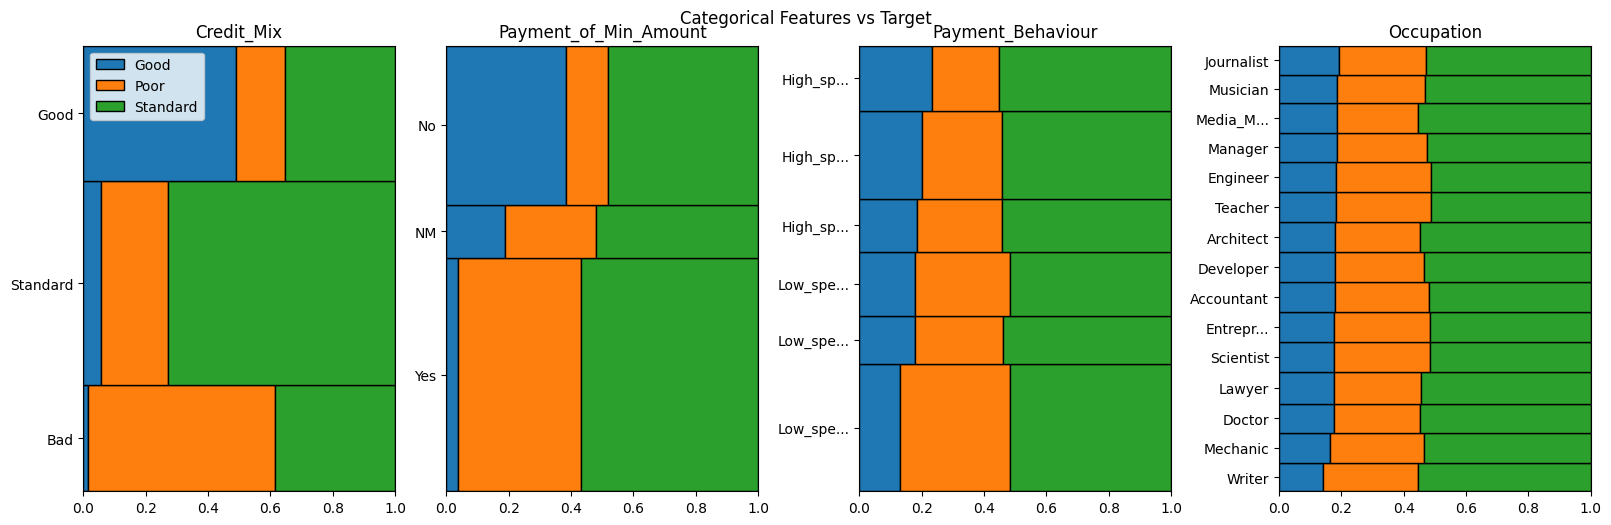

In [27]:
#automated eda
import dabl
dabl.plot(df, target_col="Credit_Score")

In [28]:
df.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

no datatype conversion needed

In [89]:
df.to_csv("clean_credit_data.csv")

In [6]:
clean_df=pd.read_csv(r"clean_credit_data.csv")

In [7]:
clean_df

,Unnamed: 0,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,encoded_ Credit_Mix,encoded_Occupation,encoded_Payment_of_Min_Amount,encoded_Payment_Behaviour,encoded_ Type_of_Loan
0,0,19114.120000,1824.843333,3,4,3,4,3,7,11.27000,...,265,49.574949,21.465380,312.494089,Good,1,12,1,2,128
1,1,19114.120000,1824.843333,3,4,3,4,3,4,11.27000,...,266,49.574949,21.465380,284.629163,Good,1,12,1,3,128
2,2,19114.120000,1824.843333,3,4,3,4,3,7,11.27000,...,267,49.574949,21.465380,331.209863,Good,1,12,1,4,128
3,3,50516.683187,1824.843333,3,4,3,4,5,4,6.27000,...,268,49.574949,21.465380,223.451310,Good,1,12,1,5,128
4,4,50516.683187,1824.843333,3,4,3,4,6,4,10.47076,...,269,49.574949,21.465380,341.489231,Good,1,12,1,1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,39628.990000,3359.415833,4,6,7,2,23,7,11.50000,...,378,35.104023,24.028477,479.866228,Poor,1,9,1,0,683
99996,99996,39628.990000,3359.415833,4,6,7,2,18,7,11.50000,...,379,35.104023,24.028477,496.651610,Poor,1,9,1,1,683
99997,99997,39628.990000,3359.415833,4,6,7,2,27,6,11.50000,...,380,35.104023,24.028477,516.809083,Poor,1,9,1,0,683
99998,99998,39628.990000,3359.415833,4,6,7,2,20,6,11.50000,...,381,35.104023,24.028477,319.164979,Standard,1,9,1,3,683


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Annual_Income                  100000 non-null  float64
 1   Monthly_Inhand_Salary          100000 non-null  float64
 2   Num_Bank_Accounts              100000 non-null  int64  
 3   Num_Credit_Card                100000 non-null  int64  
 4   Interest_Rate                  100000 non-null  int64  
 5   Num_of_Loan                    100000 non-null  int64  
 6   Delay_from_due_date            100000 non-null  int64  
 7   Num_of_Delayed_Payment         100000 non-null  int64  
 8   Changed_Credit_Limit           100000 non-null  float64
 9   Num_Credit_Inquiries           100000 non-null  float64
 10  Outstanding_Debt               100000 non-null  float64
 11  Credit_Utilization_Ratio       100000 non-null  float64
 12  Credit_History_Age             

Histogram data

In [ ]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(numerical_columns):
    sns.histplot(nc_df[col], ax=axes[i], kde=True, bins=20)  # Adjust bins as needed
    axes[i].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show(fig)

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

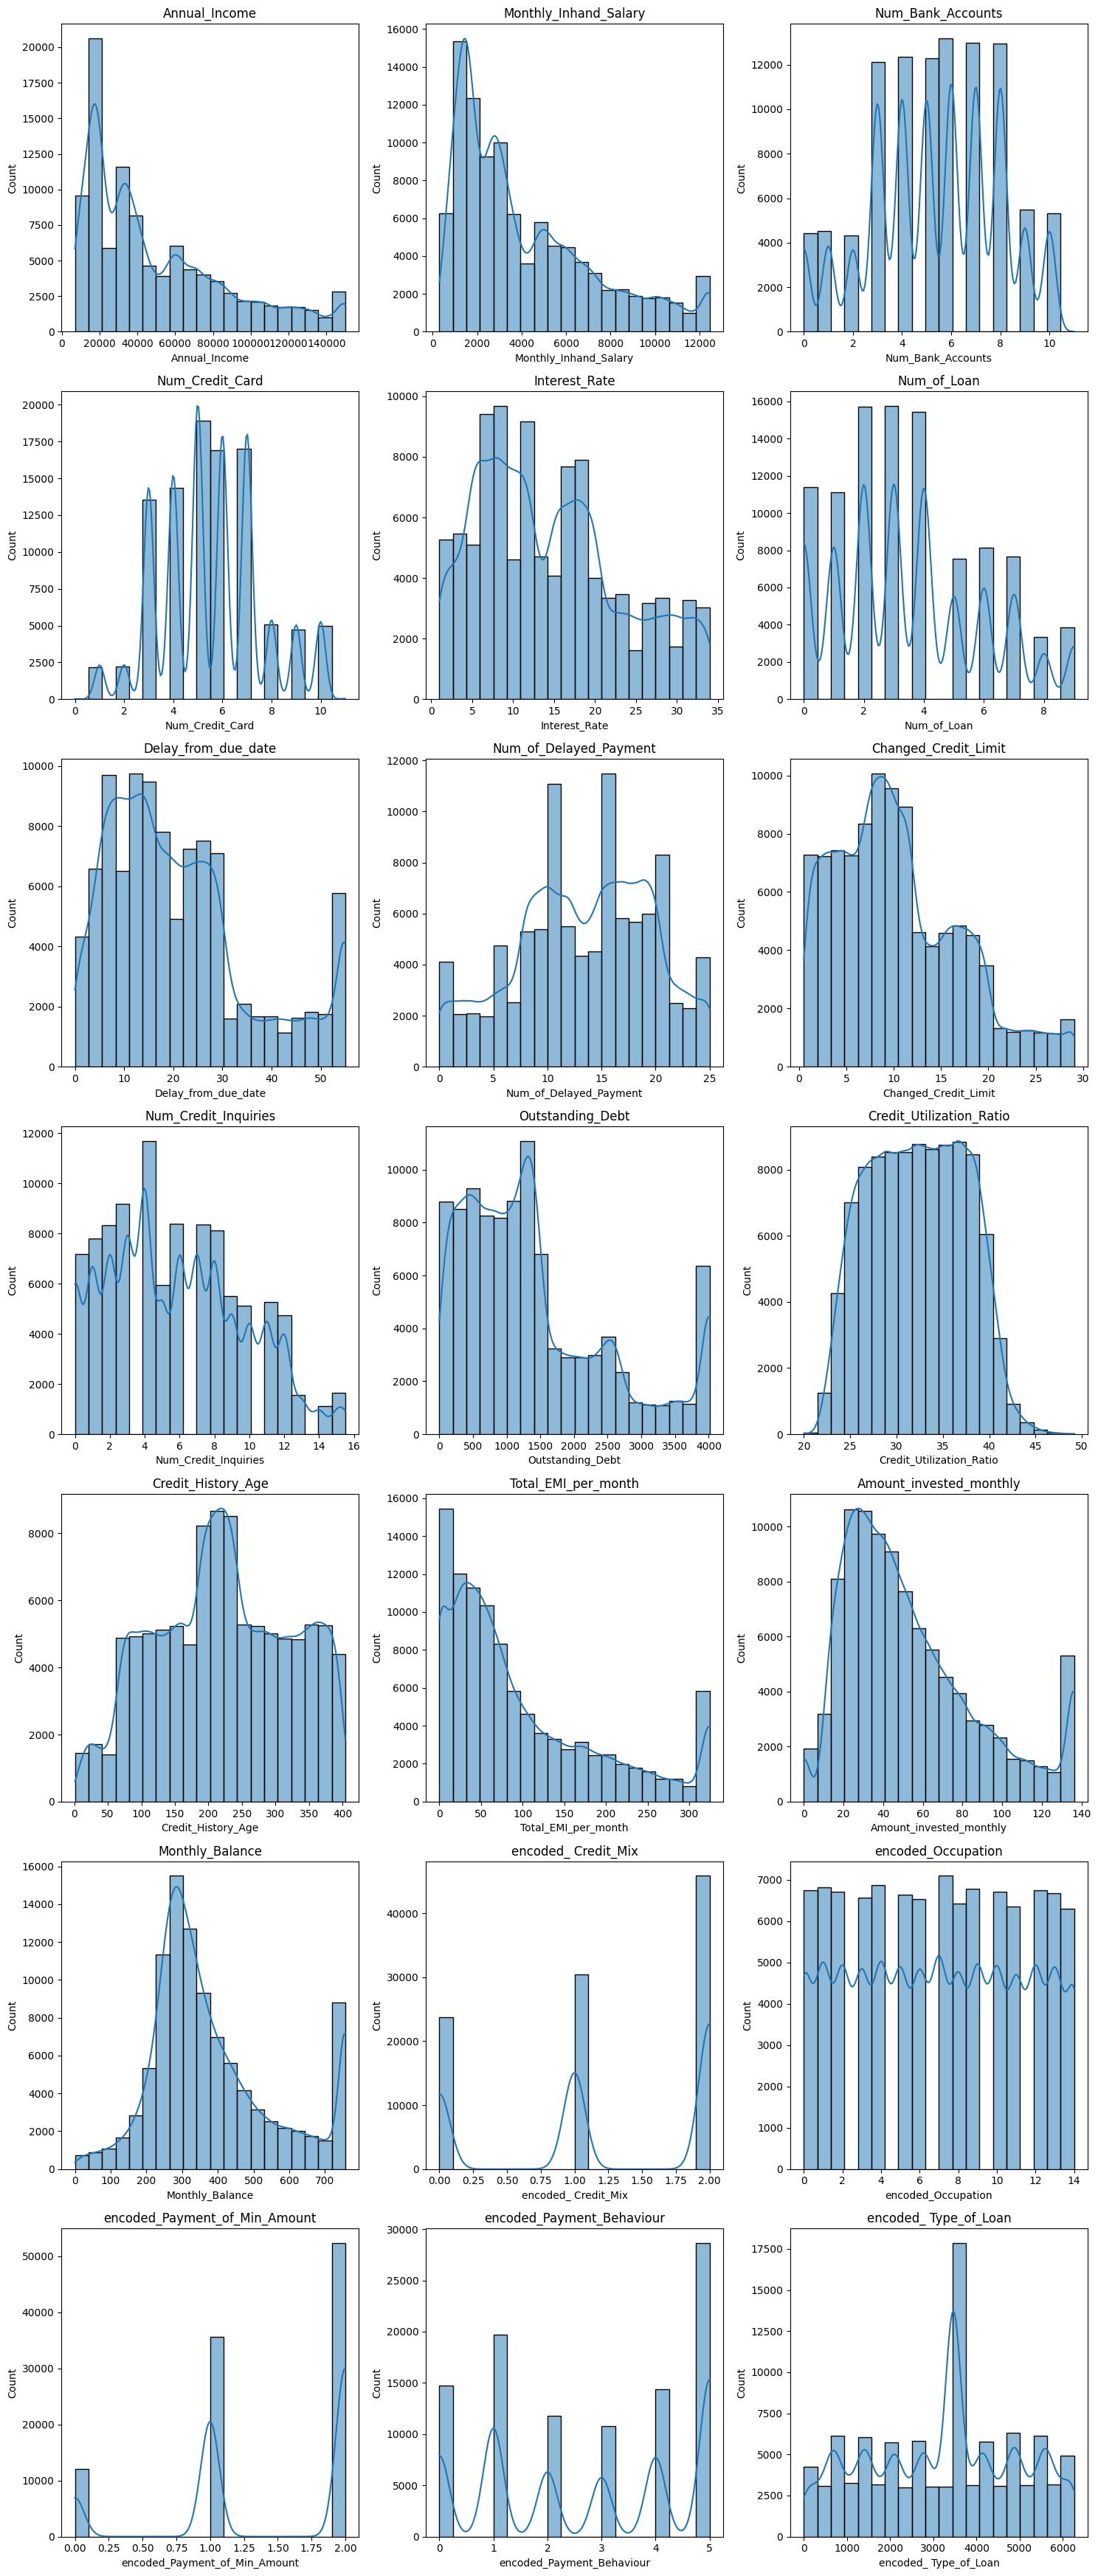

In [88]:
#Plotting the histogram of numerical columns
raw_numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [column for column in raw_numerical_columns]

nc_df = df
num_plots = len(numerical_columns)
num_cols = min(num_plots, 3)  
num_rows = (num_plots - 1) // num_cols + 1 if num_plots > 1 else 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(numerical_columns):
    sns.histplot(nc_df[col], ax=axes[i], kde=True, bins=20)  # Adjust bins as needed
    axes[i].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show(fig)

In [8]:
clean_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [97]:
clean_df.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'encoded_ Credit_Mix',
       'encoded_Occupation', 'encoded_Payment_of_Min_Amount',
       'encoded_Payment_Behaviour', 'encoded_ Type_of_Loan'],
      dtype='object')

In [9]:

x = np.array(clean_df[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                    'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                    'Num_Credit_Inquiries',  'Outstanding_Debt','encoded_ Credit_Mix',
                    'Credit_History_Age', 'encoded_Payment_of_Min_Amount',"Amount_invested_monthly",
                    'encoded_Payment_Behaviour', 'Monthly_Balance']])
y = np.array(clean_df[["Credit_Score"]])

In [11]:
x[1]

array([1.91141200e+04, 1.82484333e+03, 3.00000000e+00, 4.00000000e+00,
       3.00000000e+00, 4.00000000e+00, 3.00000000e+00, 4.00000000e+00,
       1.12700000e+01, 4.00000000e+00, 8.09980000e+02, 1.00000000e+00,
       2.66000000e+02, 1.00000000e+00, 2.14653803e+01, 3.00000000e+00,
       2.84629163e+02])

Splitting test and training data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (80000, 17)
Number transactions y_train dataset:  (80000, 1)
Number transactions X_test dataset:  (20000, 17)
Number transactions y_test dataset:  (20000, 1)


Smote

In [5]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
sm = SMOTE(random_state = 2) 
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': [0]
Before OverSampling, counts of label '0': [0] 

After OverSampling, the shape of train_X: (127725, 17)
After OverSampling, the shape of train_y: (127725,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [6]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
sm = SMOTE(random_state = 2) 
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_test_smote.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_test_smote.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_test_smote == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_test_smote == 0)))

Before OverSampling, counts of label '1': [0]
Before OverSampling, counts of label '0': [0] 

After OverSampling, the shape of train_X: (31797, 17)
After OverSampling, the shape of train_y: (31797,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [147]:
len(X_train_smote)

127725

Scaling

In [121]:
scaler = StandardScaler()
scaler.fit_transform(X_train_smote)
scaler.fit(X_test)

StandardScaler()

Modelling

In [8]:
# Creating dataframes for testing and training evaluation metrics
training_eval_df=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1-Score'])
testing_eval_df=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1-Score'])

In [9]:
classm1=LogisticRegression(random_state=42,max_iter=1000)
classm1.fit(X_train_smote, y_train_smote)

d:\projectyoutube\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [23]:
y_train_pred = classm1.predict(X_train_smote)

accuracy = accuracy_score(y_train_pred,y_train_smote)
precision = precision_score(y_train_pred,y_train_smote,average="weighted")
recall = recall_score(y_train_pred,y_train_smote,average="weighted")
f1_score_value = f1_score(y_train_pred,y_train_smote,average="weighted")
training_eval_df.loc[len(training_eval_df.index)] = ['Logistic Regression', accuracy, precision, recall, f1_score_value] 

In [24]:
# Testing Evaluation
y_test_pred = classm1.predict(X_test_smote)

accuracy = accuracy_score(y_test_pred,y_test_smote)
precision = precision_score(y_test_pred,y_test_smote,average="weighted")
recall = recall_score(y_test_pred,y_test_smote,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test_smote,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['Logistic Regression test', accuracy, precision, recall, f1_score_value]  

In [32]:
classm2 = DecisionTreeClassifier(random_state=1)
# train the classifier
classm2.fit(X_train_smote, y_train_smote)
# predict using classifier


DecisionTreeClassifier(random_state=1)

In [33]:
y_train_pred = classm2.predict(X_train_smote)

accuracy = accuracy_score(y_train_pred,y_train_smote)
precision = precision_score(y_train_pred,y_train_smote,average="weighted")
recall = recall_score(y_train_pred,y_train_smote,average="weighted")
f1_score_value = f1_score(y_train_pred,y_train_smote,average="weighted")
training_eval_df.loc[len(training_eval_df.index)] = ['DecisionTree', accuracy, precision, recall, f1_score_value] 

In [34]:
# Testing Evaluation
y_test_pred = classm2.predict(X_test_smote)

accuracy = accuracy_score(y_test_pred,y_test_smote)
precision = precision_score(y_test_pred,y_test_smote,average="weighted")
recall = recall_score(y_test_pred,y_test_smote,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test_smote,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['DecisionTree', accuracy, precision, recall, f1_score_value] 

In [48]:
classm3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
classm3.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, random_state=42)

In [58]:
y_train_pred = classm3.predict(X_train_smote)

accuracy = accuracy_score(y_train_pred,y_train_smote)
precision = precision_score(y_train_pred,y_train_smote,average="weighted")
recall = recall_score(y_train_pred,y_train_smote,average="weighted")
f1_score_value = f1_score(y_train_pred,y_train_smote,average="weighted")
training_eval_df.loc[len(training_eval_df.index)] = ['RandomForestClassifier', accuracy, precision, recall, f1_score_value]

In [59]:
# Testing Evaluation
y_test_pred = classm3.predict(X_test_smote)

accuracy = accuracy_score(y_test_pred,y_test_smote)
precision = precision_score(y_test_pred,y_test_smote,average="weighted")
recall = recall_score(y_test_pred,y_test_smote,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test_smote,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['RandomForestClassifier', accuracy, precision, recall, f1_score_value] 

In [60]:
classm4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
classm4.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [61]:
y_train_pred = classm4.predict(X_train_smote)

accuracy = accuracy_score(y_train_pred,y_train_smote)
precision = precision_score(y_train_pred,y_train_smote,average="weighted")
recall = recall_score(y_train_pred,y_train_smote,average="weighted")
f1_score_value = f1_score(y_train_pred,y_train_smote,average="weighted")
training_eval_df.loc[len(training_eval_df.index)] = ['GradientBoostingClassifier', accuracy, precision, recall, f1_score_value]

In [62]:
# Testing Evaluation
y_test_pred = classm4.predict(X_test_smote)

accuracy = accuracy_score(y_test_pred,y_test_smote)
precision = precision_score(y_test_pred,y_test_smote,average="weighted")
recall = recall_score(y_test_pred,y_test_smote,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test_smote,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['GradientBoostingClassifier', accuracy, precision, recall, f1_score_value] 

In [7]:
classm5 = KNeighborsClassifier(n_neighbors=3)
classm5.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_train_pred = classm5.predict(X_train_smote)

accuracy = accuracy_score(y_train_pred,y_train_smote)
precision = precision_score(y_train_pred,y_train_smote,average="weighted")
recall = recall_score(y_train_pred,y_train_smote,average="weighted")
f1_score_value = f1_score(y_train_pred,y_train_smote,average="weighted")
training_eval_df.loc[len(training_eval_df.index)] = ['KNeighborsClassifier', accuracy, precision, recall, f1_score_value]

In [65]:
# Testing Evaluation
y_test_pred = classm5.predict(X_test_smote)

accuracy = accuracy_score(y_test_pred,y_test_smote)
precision = precision_score(y_test_pred,y_test_smote,average="weighted")
recall = recall_score(y_test_pred,y_test_smote,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test_smote,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['KNeighborsClassifier', accuracy, precision, recall, f1_score_value] 

In [66]:
training_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.651219,0.671570,0.651219,0.657260
1,DecisionTree,1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier,0.734124,0.759917,0.734124,0.739180
3,GradientBoostingClassifier,0.746173,0.760670,0.746173,0.749175
4,KNeighborsClassifier,0.921120,0.926362,0.921120,0.922320


In [67]:
testing_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression test,0.652263,0.670445,0.652263,0.657985
1,DecisionTree,0.738906,0.738537,0.738906,0.738129
2,RandomForestClassifier,0.741548,0.770197,0.741548,0.747222
3,GradientBoostingClassifier,0.749127,0.764527,0.749127,0.752494
4,KNeighborsClassifier,0.786458,0.785054,0.786458,0.785254


In [8]:
# Save the Random Forest Classifier model
with open('bank_cl_model.pkl', 'wb') as file:
    pickle.dump(classm5, file)

print("saved sucessfull")

saved sucessfull


In [13]:
model=joblib.load(r"D:\projectyoutube\banking\bank_cl_model.pkl")

In [14]:
x[0]


array([1.91141200e+04, 1.82484333e+03, 3.00000000e+00, 4.00000000e+00,
       3.00000000e+00, 4.00000000e+00, 3.00000000e+00, 7.00000000e+00,
       1.12700000e+01, 4.00000000e+00, 8.09980000e+02, 1.00000000e+00,
       2.65000000e+02, 1.00000000e+00, 2.14653803e+01, 2.00000000e+00,
       3.12494089e+02])

Predictive Analysis

In [17]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i=  float(input("credit limit: "))
j=  float(input("credit inquiries: "))
k = float(input("Outstanding Debt: "))
l = float(input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : "))
m=  float(input('Payment_of_Min_Amount'))
n = float(input("Credit History Age: "))
o=  float(input("monthly investment: "))
p=  float(input("payment behaviour: "))
q = float(input("Monthly Balance: "))
features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l,m,n,o,p,q]])
print("Predicted Credit Score = ", model.predict(features))

Credit Score Prediction : 
Predicted Credit Score =  ['Good']
